Consider the evolution of a simple Hamiltonian into a problem-specific Hamiltonian where the optimal solution is 'encoded' in the ground state of the problem Hamiltonian $\displaystyle \hat{\mathcal{H}}_{\text{P}}$

$$\hat{\mathcal{H}}\left(s\right) = \left(1 - s\right)\hat{\mathcal{H}}_0 + s\underbrace{\left(\alpha\hat{\mathcal{H}}_{\text{A}} + \hat{\mathcal{H}}_{\text{B}}\right)}_{\hat{\mathcal{H}}_{\text{P}}},\qquad\hat{\mathcal{H}}_{\text{B}} = -\sum_{i = 1}^np_ix_i$$

for some $\displaystyle s = \frac{t}{T}$ where $T$ is the total computation time with

$$\begin{dcases}
    \quad\text{Transverse}:\qquad&\hat{\mathcal{H}}_0 = -\sum_i\sigma_x^i\\
    \quad\text{Mixed}:\qquad&\hat{\mathcal{H}}_0 = -\sum_{i < j}\sigma_x^i\sigma_x^j
\end{dcases}$$

and

$$\hat{\mathcal{H}}_{\text{A}} = \left[\sum_{j = 0}^{M - 1}2^jy_j + \left(c + 1 - 2^M\right)y_M - \sum_{i = 1}^nw_ix_i\right]^2,\qquad S\left(n\right) = O\left(n + \left\lfloor\log_2c\right\rfloor + 1\right)$$

where $\displaystyle \alpha > \max\left(p_j\right)$ and $\displaystyle M = \left\lfloor\log_2c\right\rfloor$ s.t. $2^{\ell + 1} \leq c < 2^{M + 1}$


In [1]:
from quantum_annealing_engine import Coffey, MakeGraphCoffey
import numpy as np

Initial Hamiltonian set as transverse!

Note that by default Initial Hamiltonian will use transverse Hamiltonian!

Initial Hamiltonian set as mixed!



/opt/homebrew/lib/python3.13/site-packages/qutip/core/qobj.py:1623: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


Quantum annealing complete!

Probabilities computed!

Spectrum computed!



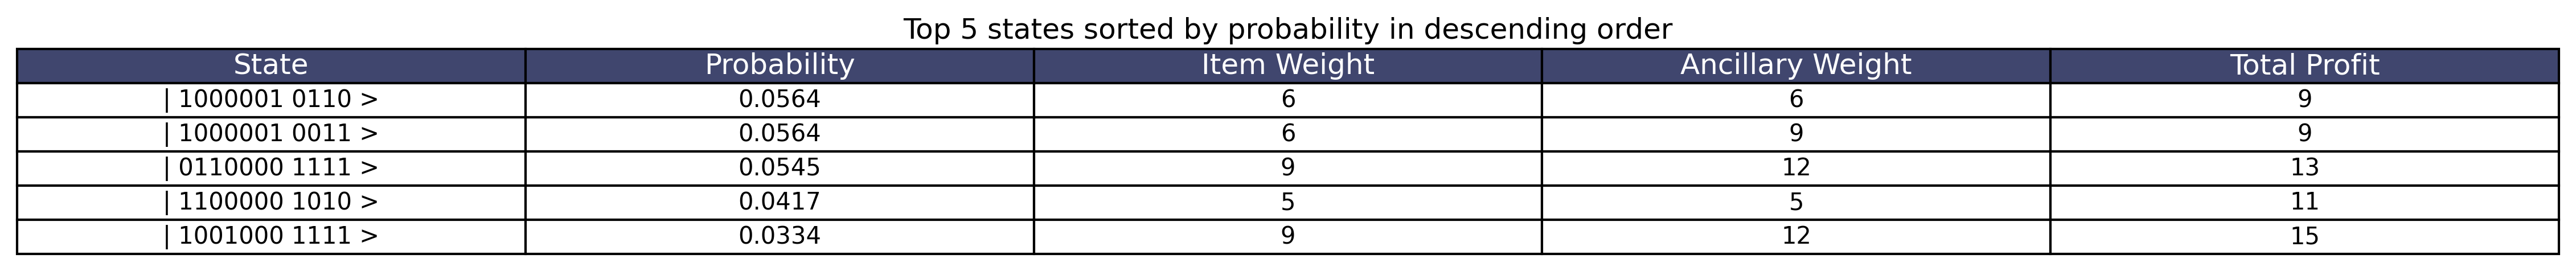

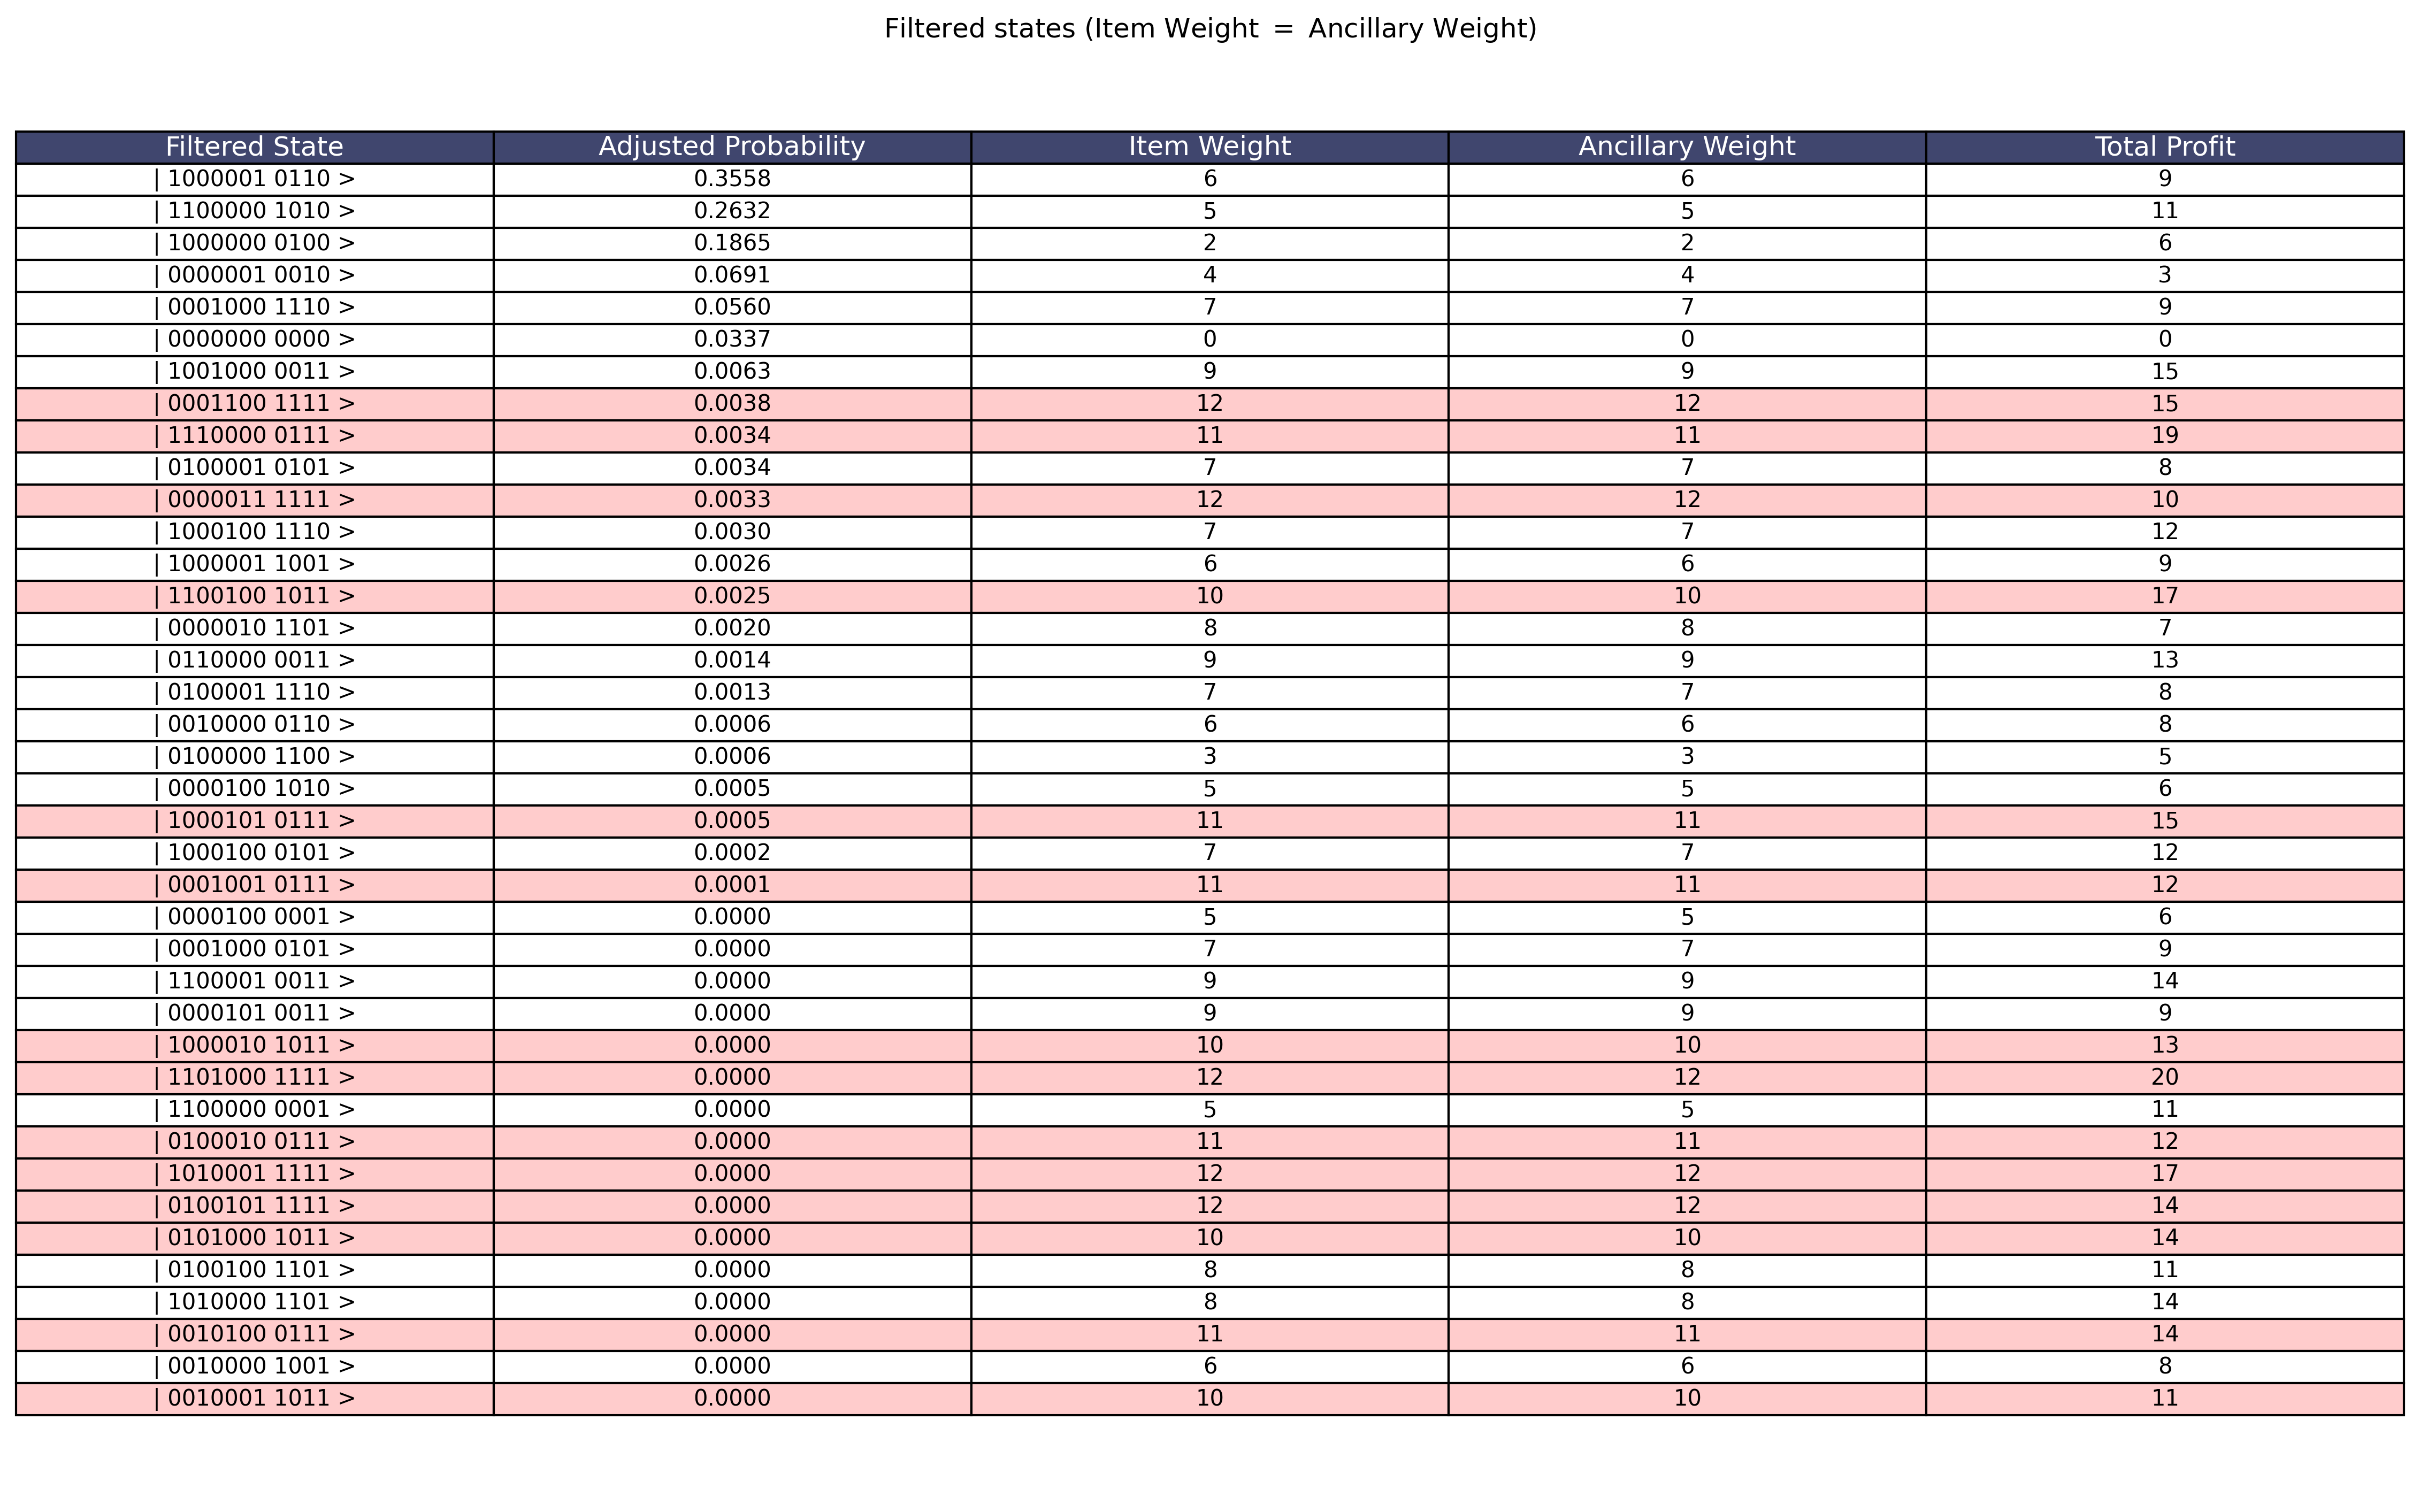

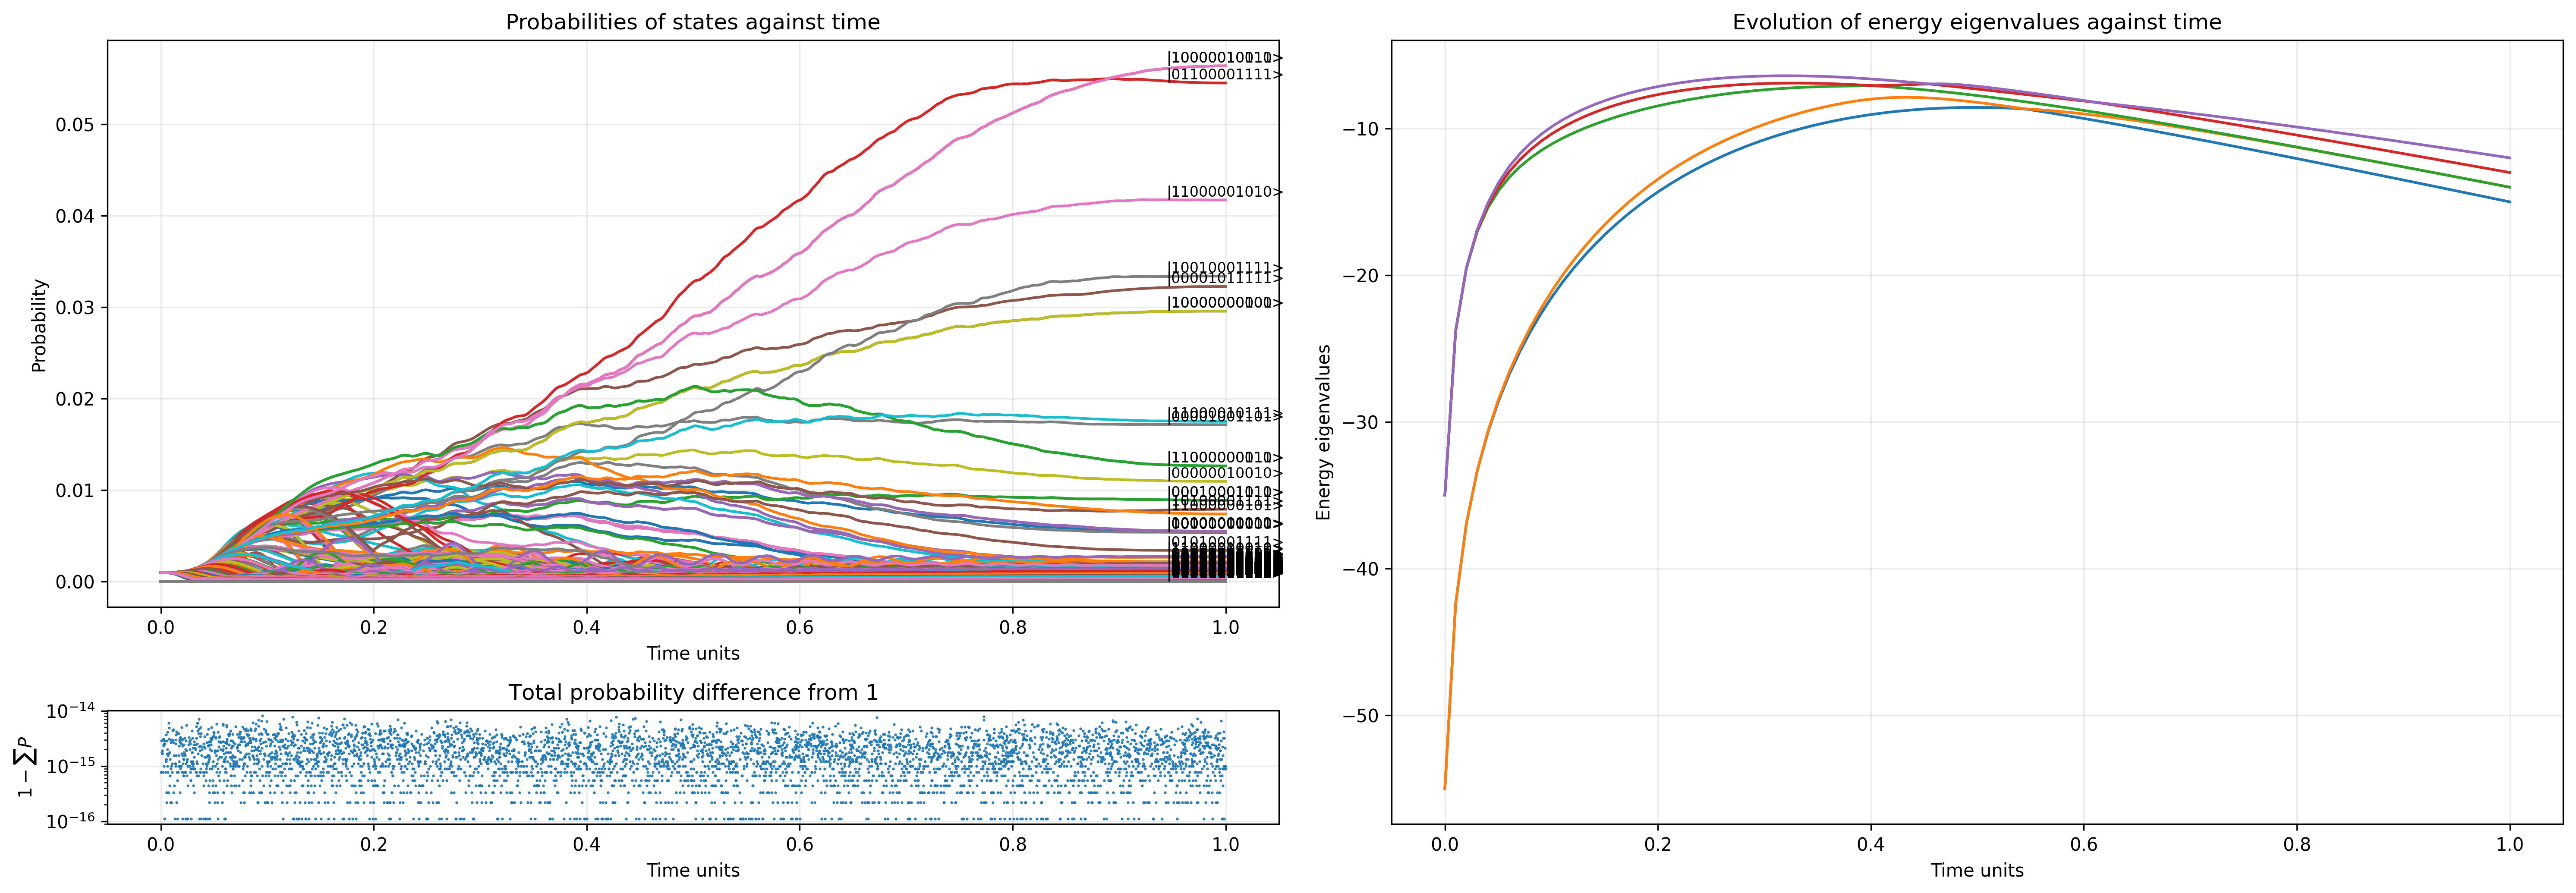

In [2]:
#   Parameters to set
# profits = np.array([10, 2])
# weights = np.array([1, 2])
# capacity = 2

# profits = np.array([8, 3, 5, 6, 9])
# weights = np.array([1, 2, 1, 3, 2])
# capacity = 7

profits = np.array([6, 5, 8, 9, 6, 7, 3])
weights = np.array([2, 3, 6, 7, 5, 8, 4])
capacity = 9

num_steps = 10000
num_spectrum_steps = 100

sim = Coffey(profits, weights, capacity)

sim.set_H_0_state("mixed")

res = sim.anneal(num_steps)
probs = sim.compute_probs(res)
spectrum = sim.compute_spectrum(num_spectrum_steps)

dis = MakeGraphCoffey()
dis.set_probs(probs)
dis.set_spectrum(spectrum)

dis.display_probs(sim)
dis.display_filtered_probs(sim)
dis.display_graph(sim)